In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('IMDB_clean_transformed_data copy.csv')

<font size='20px' color = 'red'>-----------1. Regression on revenue------------</font>

In [4]:
df.shape

(81234, 507)

### Leaving only rows where worlwide_gross_income is defined and have a '$' in it:

In [5]:
len(df[df.worlwide_gross_income.notna()])

29880

In [6]:
df = df[df.worlwide_gross_income.notna()]

In [7]:
df = df[df.worlwide_gross_income.str.startswith('$')]

### replace dollar sign and convert it to integer

In [8]:
df.worlwide_gross_income = df.worlwide_gross_income.apply(lambda x: int(x.replace('$', '')))

In [9]:
df.worlwide_gross_income.describe()

count    2.981900e+04
mean     2.287928e+07
std      8.937314e+07
min      1.000000e+00
25%      1.212135e+05
50%      1.127097e+06
75%      8.494152e+06
max      2.797801e+09
Name: worlwide_gross_income, dtype: float64

In [10]:
df = df[df.worlwide_gross_income != 1]

In [11]:
df.worlwide_gross_income.describe()

count    2.981800e+04
mean     2.288005e+07
std      8.937454e+07
min      1.700000e+01
25%      1.212280e+05
50%      1.127280e+06
75%      8.494283e+06
max      2.797801e+09
Name: worlwide_gross_income, dtype: float64

In [12]:
df.shape

(29818, 507)

In [13]:
from sklearn import linear_model

In [14]:
regLasso = linear_model.Lasso()

In [15]:
X = df.drop(columns = ['Unnamed: 0', 'imdb_title_id', 'title', 'original_title', 'genre', 'country',\
           'language', 'director', 'writer', 'production_company', 'actors', 'budget',\
            'usa_gross_income', 'metascore', 'worlwide_gross_income', 'Good_movie'])

In [16]:
Y = df.worlwide_gross_income

In [17]:
regLasso.fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3019192693887599e+19, tolerance: 2.381724922755287e+16
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
d = {X.columns[i]: regLasso.coef_[i] for i in range(0, len(X.columns))}

In [19]:
s = pd.Series(d)

In [20]:
s[s != 0].head(40)

year                    3.977117e+05
duration                2.115666e+05
avg_vote               -2.352258e+06
votes                   2.880639e+02
reviews_from_users      1.133781e+05
reviews_from_critics    1.760315e+05
n_top_directors        -8.168403e+05
n_top_writers           2.883320e+06
n_top_prodComp          3.199556e+06
n_top_actors            1.067771e+06
genre_Sport            -7.356250e+05
genre_Musical          -2.170793e+05
genre_Comedy            9.798628e+05
genre_Sci-Fi            8.906385e+04
genre_Biography        -9.704727e+06
genre_Western          -1.577002e+07
genre_Mystery          -8.545277e+06
genre_Crime            -8.879320e+06
genre_Animation         2.662861e+07
genre_Film-Noir        -1.583871e+07
genre_Adventure         3.118879e+07
genre_Family            1.017140e+07
genre_War              -4.341714e+06
genre_Music             1.982667e+06
genre_History          -3.393392e+06
genre_Fantasy           6.078881e+06
genre_Action            3.862494e+06
g

### From the code sell above, we do not think that 'avg_vote', 'votes', or reviews can cause higher revenue. Probably it is an outcome of high revenue. We want to look at the other results. Genres will be covered in next finding.

In [21]:
df.corr()['worlwide_gross_income'].nlargest(15)

worlwide_gross_income    1.000000
reviews_from_users       0.666750
votes                    0.659223
reviews_from_critics     0.578798
genre_Adventure          0.280644
country_USA              0.253362
n_top_actors             0.211181
language_English         0.183597
genre_Action             0.170183
n_top_prodComp           0.144783
genre_Sci-Fi             0.139903
n_top_writers            0.138250
duration                 0.138063
avg_vote                 0.137545
n_top_directors          0.119036
Name: worlwide_gross_income, dtype: float64

### Year:

In [22]:
df.year.describe()

count    29818.000000
mean      2005.792139
std         12.522356
min       1920.000000
25%       2002.000000
50%       2009.000000
75%       2014.000000
max       2019.000000
Name: year, dtype: float64

In [23]:
df['year_10_gap'] = pd.cut(df.year, bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])

In [24]:
graph = df.groupby('year_10_gap')['worlwide_gross_income'].mean()

In [25]:
graph = pd.DataFrame(graph).reset_index()

In [26]:
graph

,year_10_gap,worlwide_gross_income
0,"(1920, 1930]",1.519527e+06
1,"(1930, 1940]",1.096700e+07
2,"(1940, 1950]",5.586137e+06
3,"(1950, 1960]",4.115317e+06
4,"(1960, 1970]",1.032657e+07
5,"(1970, 1980]",2.401766e+07
6,"(1980, 1990]",2.116160e+07
7,"(1990, 2000]",3.354319e+07
8,"(2000, 2010]",2.047933e+07
9,"(2010, 2020]",2.340568e+07


In [27]:
import matplotlib.pyplot as plt

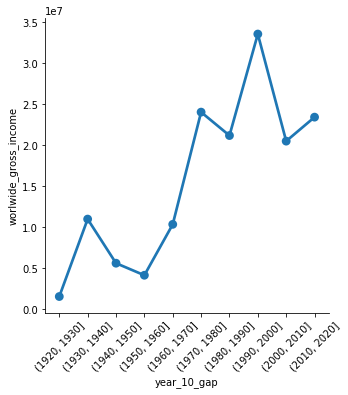

In [28]:
chart = sns.catplot(x = 'year_10_gap', y ='worlwide_gross_income', data = graph, kind = 'point')
chart.set_xticklabels(rotation=45)

### Duration:

95th percentile of the duration column is 142 minutes. It is around the **peak** on the graph.

In [29]:
df.duration.describe(percentiles = [0.95])

count    29818.000000
mean       105.222953
std         20.429578
min         45.000000
50%        101.000000
95%        142.000000
max        808.000000
Name: duration, dtype: float64

In [30]:
df['duration_bins'] = pd.cut(df.duration, bins =[45,65,92,101,114,150,200,250,300,350,400,450,808])

In [31]:
graph = df.groupby('duration_bins')['worlwide_gross_income'].mean()

In [32]:
graph = pd.DataFrame(graph).reset_index()

In [33]:
graph

,duration_bins,worlwide_gross_income
0,"(45, 65]",3.725151e+06
1,"(65, 92]",1.119616e+07
2,"(92, 101]",1.435056e+07
3,"(101, 114]",2.155407e+07
4,"(114, 150]",4.487937e+07
5,"(150, 200]",5.257979e+07
6,"(200, 250]",4.871698e+07
7,"(250, 300]",2.316163e+06
8,"(300, 350]",1.111214e+05
9,"(350, 400]",1.499423e+06


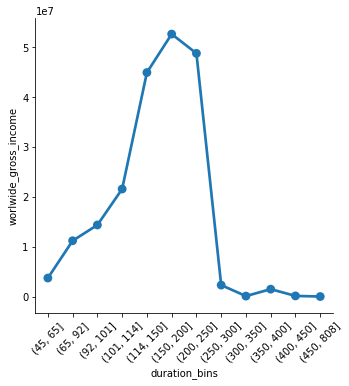

In [34]:
chart = sns.catplot(x = 'duration_bins', y ='worlwide_gross_income', data = graph, kind = 'point')
chart.set_xticklabels(rotation=45)

### Number of top directors:

In [35]:
graph = df.groupby('n_top_directors')['worlwide_gross_income'].mean()

In [36]:
graph = pd.DataFrame(graph).reset_index()

In [37]:
graph

,n_top_directors,worlwide_gross_income
0,0,1.418954e+07
1,1,3.427546e+07
2,2,6.476552e+07


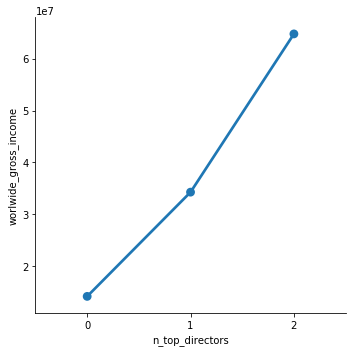

In [38]:
chart = sns.catplot(x = 'n_top_directors', y ='worlwide_gross_income', data = graph, kind = 'point')

### Number of top writers:

In [39]:
graph = df.groupby('n_top_writers')['worlwide_gross_income'].mean()

In [40]:
graph = pd.DataFrame(graph).reset_index()

In [41]:
graph

,n_top_writers,worlwide_gross_income
0,0,1.335150e+07
1,1,2.781221e+07
2,2,5.339252e+07


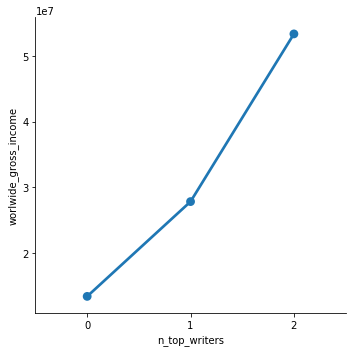

In [42]:
chart = sns.catplot(x = 'n_top_writers', y ='worlwide_gross_income', data = graph, kind = 'point')

### Number of top actors:

In [43]:
graph = df.groupby('n_top_actors')['worlwide_gross_income'].mean()

In [44]:
graph = pd.DataFrame(graph).reset_index()

In [45]:
graph

,n_top_actors,worlwide_gross_income
0,0,1.460639e+06
1,1,2.512414e+06
2,2,3.607717e+06
3,3,4.555139e+06
4,4,5.729506e+06
5,5,9.423274e+06
6,6,1.214683e+07
7,7,1.473718e+07
8,8,1.725537e+07
9,9,2.359210e+07


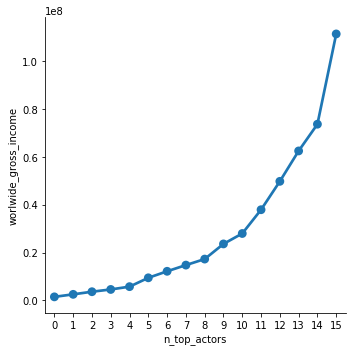

In [46]:
chart = sns.catplot(x = 'n_top_actors', y ='worlwide_gross_income', data = graph, kind = 'point')

### Number of top production companies:

In [47]:
graph = df.groupby('n_top_prodComp')['worlwide_gross_income'].mean()

In [48]:
graph = pd.DataFrame(graph).reset_index()

In [49]:
graph

,n_top_prodComp,worlwide_gross_income
0,0,9.021456e+06
1,1,3.507114e+07
2,2,9.574025e+06


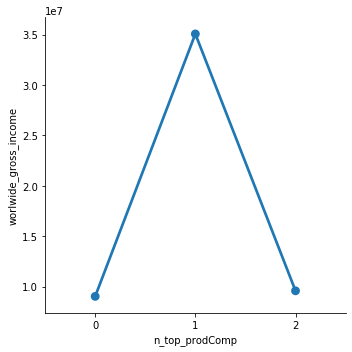

In [50]:
chart = sns.catplot(x = 'n_top_prodComp', y ='worlwide_gross_income', data = graph, kind = 'point')

Probably when 2 production companies are working on the same movie it is not beneficial.

<font size='20px' color = 'red'>-------------MANAGERIAL INSIGHT-------------</font>

**Managerial inside**: In general movies industry is growing in terms of the revenue. Do not produce movies longer than ~140 minutes. Investors probably should invest into movies where only one experienced production company is working on the movie, because second production company does not produce any additional revenue, but add additional cost to the movie. To chose the right number of experienced diretors/writers/actors should be performed marginal analysis, because each situation is unique. In general the more of these people you hire, the better.

<font size='5px' color = 'red'>---------------2. GROSS INCOME AND PRODUCTION TREND BY GENRES-----------------</font>

In [51]:
len(df)

29818

In [52]:
df.head(1)

,Unnamed: 0,imdb_title_id,title,original_title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Good_movie,n_top_directors,n_top_writers,n_top_prodComp,n_top_actors,genre_Sport,genre_News,genre_Musical,genre_Comedy,genre_Sci-Fi,genre_Game-Show,genre_Biography,genre_Western,genre_Mystery,genre_Crime,genre_Animation,genre_Film-Noir,genre_Adventure,genre_Family,genre_War,genre_Adult,genre_Music,genre_History,genre_Fantasy,genre_Action,genre_Reality-TV,genre_Horror,genre_Thriller,genre_Documentary,genre_Romance,genre_Drama,country_South Korea,country_Peru,country_Iran,country_Philippines,country_Malta,country_Kuwait,country_Lesotho,country_Kazakhstan,country_Yugoslavia,country_Costa Rica,country_Bosnia and Herzegovina,country_Czech Republic,country_Russia,country_Swaziland,country_Holy See (Vatican City State),country_Austria,country_West Germany,country_Kosovo,country_Ethiopia,country_Puerto Rico,country_Djibouti,country_Netherlands Antilles,country_Tajikistan,country_New Zealand,country_UK,country_Maldives,country_Taiwan,country_Mali,country_Niger,country_Poland,country_Libya,country_Slovakia,country_Serbia and Montenegro,country_Armenia,country_Czechoslovakia,country_Turkey,country_Nepal,country_Ecuador,country_Paraguay,country_Belarus,country_Malawi,country_Finland,country_New Caledonia,country_Nicaragua,country_Svalbard And Jan Mayen,country_Argentina,country_Mozambique,country_Thailand,country_Denmark,country_Canada,country_Kenya,country_Guinea,country_Cambodia,country_Tunisia,country_Hong Kong,country_Botswana,country_Gibraltar,country_Latvia,country_Tanzania,country_The Democratic Republic Of Congo,country_Pakistan,country_Rwanda,country_Fiji,country_Brunei,country_Ghana,country_Zimbabwe,country_Cuba,country_Indonesia,country_Guatemala,country_Zaire,country_Georgia,country_Singapore,country_Malaysia,country_Mongolia,country_Japan,country_Chad,country_Andorra,country_Faroe Islands,country_Guadeloupe,country_Germany,country_Bulgaria,country_Guinea-Bissau,country_Ukraine,country_Sudan,country_Moldova,country_Trinidad and Tobago,country_Uzbekistan,country_Myanmar,country_Uruguay,country_Montenegro,country_Liechtenstein,country_Senegal,country_Federal Republic of Yugoslavia,country_Oman,country_Suriname,country_Qatar,country_Bolivia,country_Korea,country_Zambia,country_Bahrain,country_Sri Lanka,country_Burkina Faso,country_Côte d'Ivoire,country_Croatia,country_Portugal,country_Greenland,country_Serbia,country_Ireland,country_Namibia,country_Aruba,country_Estonia,country_Algeria,country_Italy,country_British Virgin Islands,country_Morocco,country_China,country_Uganda,country_Palestine,country_Monaco,country_Saudi Arabia,country_Belgium,country_Yemen,country_Venezuela,country_Israel,country_Liberia,country_Republic of Macedonia,country_Cameroon,country_Panama,country_United Arab Emirates,country_Papua New Guinea,country_Australia,country_France,country_Somalia,country_Soviet Union,country_North Korea,country_Afghanistan,country_Spain,country_Laos,country_Slovenia,country_India,country_Belize,country_Romania,country_Kyrgyzstan,country_Bhutan,country_Iceland,country_South Africa,country_Haiti,country_Mauritania,country_Mexico,country_Bermuda,country_Dominican Republic,country_Cape Verde,country_Brazil,country_Sweden,country_Hungary,country_Iraq,country_Switzerland,country_Bangladesh,country_Vietnam,country_Cyprus,country_Luxembourg,country_Jamaica,country_Lithuania,country_Angola,country_Netherlands,country_Norway,country_Chile,country_El Salvador,country_Syria,country_Reunion,country_Greece,country_USA,country_Jordan,country_Vanuatu,country_Albania,country_Lebanon,country_Burma,country_Azerbaijan,country_Honduras,country_Egypt,country_Isle Of Man,country_Nigeria,country_Colombia,country_Samoa,country_North Vietnam,country_Macao,country_Cayman Islands,country_Martinique,country_East Germany,co

In [53]:
genres = df.columns[26:52]

In [54]:
genres

Index(['genre_Sport', 'genre_News', 'genre_Musical', 'genre_Comedy',
       'genre_Sci-Fi', 'genre_Game-Show', 'genre_Biography', 'genre_Western',
       'genre_Mystery', 'genre_Crime', 'genre_Animation', 'genre_Film-Noir',
       'genre_Adventure', 'genre_Family', 'genre_War', 'genre_Adult',
       'genre_Music', 'genre_History', 'genre_Fantasy', 'genre_Action',
       'genre_Reality-TV', 'genre_Horror', 'genre_Thriller',
       'genre_Documentary', 'genre_Romance', 'genre_Drama'],
      dtype='object')

In [55]:
df_mean = df[genres].multiply(df["worlwide_gross_income"], axis="index").mean().round()

In [56]:
df_avg = df_mean.to_frame().reset_index().rename(columns ={'index':'Genre',0:'Avg_Income'}).sort_values('Avg_Income', ascending = False).head(10)

In [57]:
df_avg

,Genre,Avg_Income
12,genre_Adventure,9565187.0
19,genre_Action,9066190.0
3,genre_Comedy,8422227.0
25,genre_Drama,8250565.0
22,genre_Thriller,3260247.0
4,genre_Sci-Fi,3079239.0
18,genre_Fantasy,2988490.0
10,genre_Animation,2962675.0
24,genre_Romance,2768147.0
9,genre_Crime,2704513.0


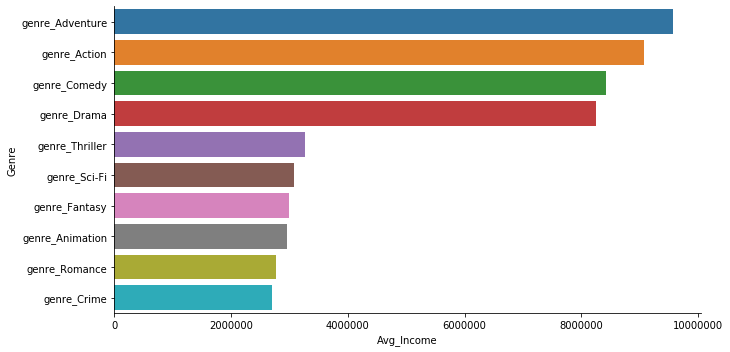

In [58]:
sns.catplot(y='Genre', data=df_avg, x='Avg_Income', aspect=2, kind='bar')
plt.ticklabel_format(style='plain', axis='x')

#### Bar chart: Top four genres made the most incomes are: Adventure, Action, Comedy and Drama

In [59]:
df1 = df.set_index('year')

In [60]:
df1.columns[25: 51]

Index(['genre_Sport', 'genre_News', 'genre_Musical', 'genre_Comedy',
       'genre_Sci-Fi', 'genre_Game-Show', 'genre_Biography', 'genre_Western',
       'genre_Mystery', 'genre_Crime', 'genre_Animation', 'genre_Film-Noir',
       'genre_Adventure', 'genre_Family', 'genre_War', 'genre_Adult',
       'genre_Music', 'genre_History', 'genre_Fantasy', 'genre_Action',
       'genre_Reality-TV', 'genre_Horror', 'genre_Thriller',
       'genre_Documentary', 'genre_Romance', 'genre_Drama'],
      dtype='object')

In [61]:
df2 = df1[df1.columns[25: 51]].reset_index()

In [62]:
df_i = df2.groupby('year').sum().reset_index()

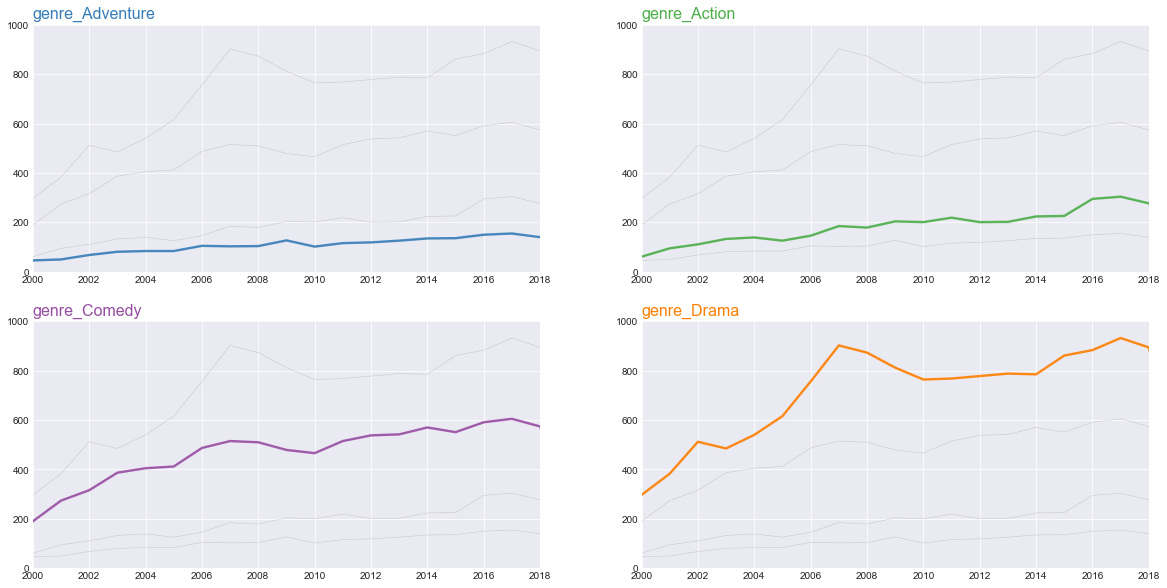

In [63]:
plt.figure(figsize=(20,10))
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
g = ["genre_Adventure","genre_Action","genre_Comedy","genre_Drama"]
for column in g:
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2, 2, num)
 
    # plot every groups, but discreet
    for v in g:
        plt.plot(df_i['year'], df_i[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df_i['year'], df_i[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(2000,2018)
    plt.ylim(0,1000)
 
    # Add title
    plt.title(column, loc='left', fontsize=16, fontweight=0, color=palette(num) )

#### Line chart: The production quantity trends of the top four genres that made the most income.
#### Managerial Insight: Adventure and Action movies can make the most worldwide income on average but the production quantity trends are pretty flat on these two genres, meaning that competition will not likely increase. So we would recommend the Adventure or Action genres to be produced in order to achieve the best worldwide income.

<font size='20px' color = 'red'>--------------3. IMDB DATA PREP---------------</font>

In [64]:
imbdrat = pd.read_csv('IMDb ratings.csv')

Merge cleaned data set with ratings.

In [65]:
df = df.merge(imbdrat)

In [66]:
df = df.drop(['Unnamed: 0'], axis = 1)

<font size='20px' color = 'red'>------------3.1 DATA EXPLORATION-----------</font>


Usually, average numbers are a good way to start to set a baseline expectation about how a population might feel. 

In [67]:
df['year_d'] = pd.cut(df.year, bins = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])

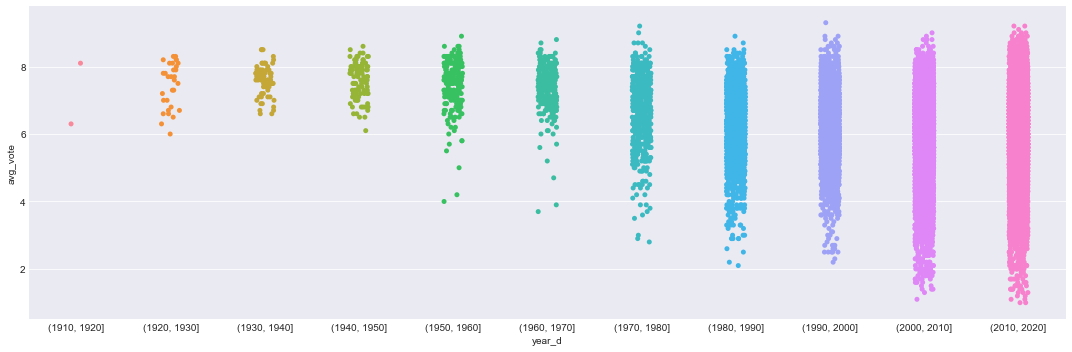

In [68]:
sns.catplot(y = 'avg_vote', x = 'year_d', data =df, aspect = 3)

From this plot, we quickly notice that there is an increasing variation in 'avg_vote' pattern over the years, causing this cone-like shape. This increase in variation is due to increasing number of movies being made each year, so a lower average score in recent years would make sense. 

Median numbers always reveal an interesting mentality about the general population and where it stands. So let's check it out by plotting it out.

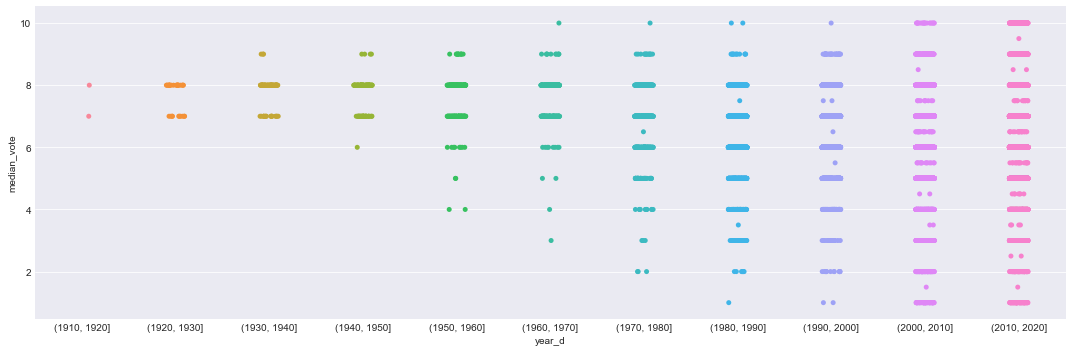

In [69]:
sns.catplot(y = 'median_vote', x = 'year_d', data =df, aspect = 3)

Usually, when we look at median values, we would expect them to fall somewhere close to the average values. In our case, we see that some years actually show that some movies median votes fall on 10 and 1, which are extremes! This is interesting so let's dig deeper.

<font size='20px' color = 'red'>--------------3.2 DATA ANALYSIS--------------</font>


### Average for Median Vote of 1

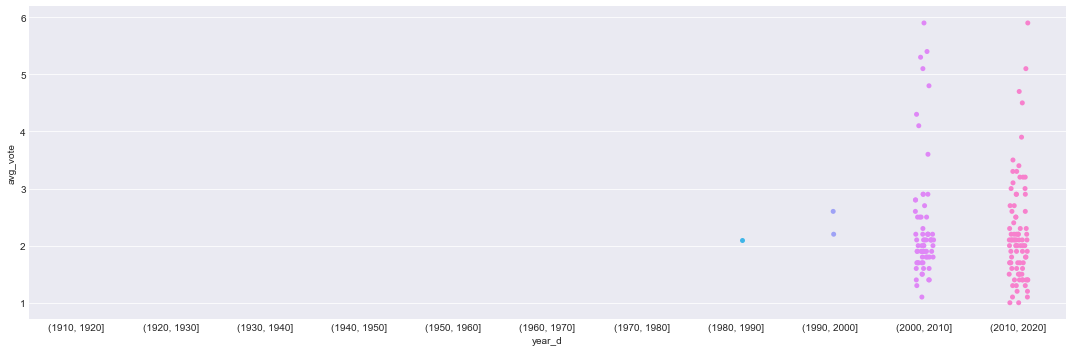

In [70]:
sns.catplot(y = 'avg_vote', x = 'year_d', data =df[df.median_vote == 1], aspect = 3)

In [71]:
df[df.median_vote == 1].avg_vote.mean()

2.264150943396226

### Average for Median Vote of 10

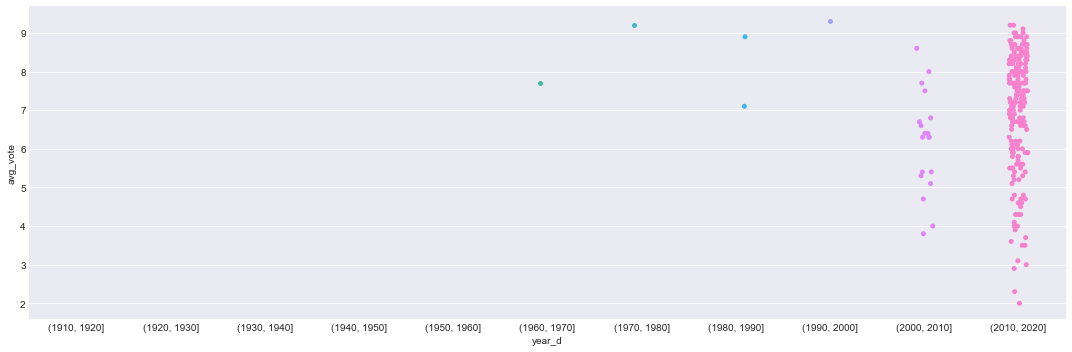

In [72]:
sns.catplot(y = 'avg_vote', x = 'year_d', data =df[df.median_vote == 10], aspect = 3)

In [73]:
df[df.median_vote == 10].avg_vote.mean()

6.910222222222227

The plots show that these extremes only started to happen in the last 2 decades.

For the extreme median votes of 1, we see that, on average, the votes are a little higher at 2.26, which makes sense. Any variation in the votes would cause the score to increase since 1 is the lowest vote. So if everyone has similar opinions about the movie, the votes would be relatively close, causing the average votes would increase slightly. Essentially, everyone agrees when a movie is terrible. The plot also shows that during the years with more movies of this category, most are concentrated closer to 1. 

However, the extreme median votes of 10 movies somehow have an average falling much lower, down to 6.9. This tells us that although most votes are 10 (remember, at least 50%), there are many other votes with much lower numbers. This tells us that even though many reviewers/voters believe these movies to be perfect, many others end up hating them in the extreme, dragging the average vote down.

Let's dig deeper into the extreme median votes of 10 movies and see if we can better understand this pattern by looking at how each gender votes on average

### Male Average Votes for Median Votes of 10 movies

In [74]:
extreme10 = df[df.median_vote == 10]

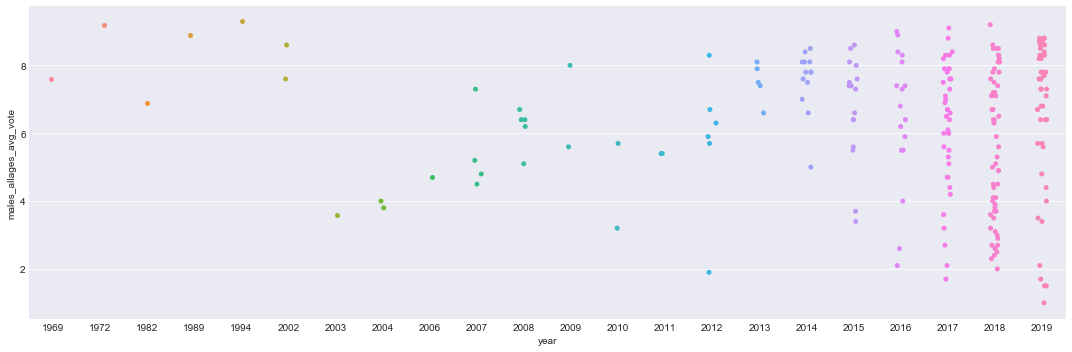

In [75]:
sns.catplot(y = 'males_allages_avg_vote', x = 'year', data =extreme10, aspect = 3)

In [76]:
ave_male = extreme10.males_allages_avg_vote.mean()
ave_male

6.2760000000000025

### Female Average Votes for Median Votes of 10 movies

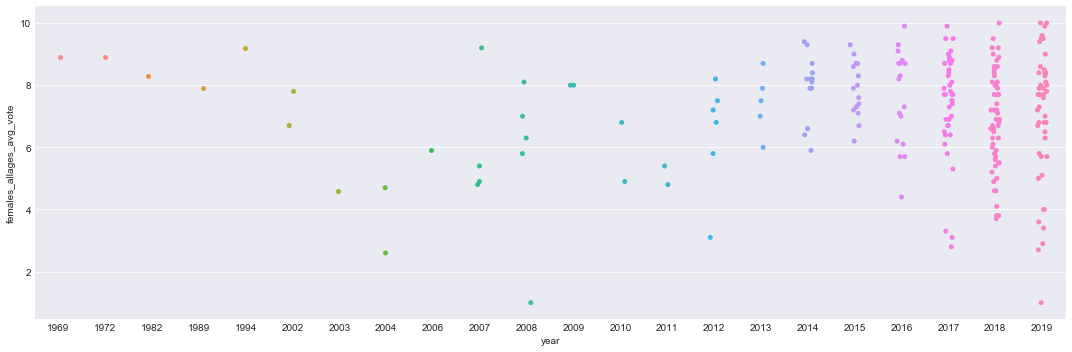

In [77]:
sns.catplot(y = 'females_allages_avg_vote', x = 'year', data =extreme10, aspect = 3)

In [78]:
ave_female = extreme10.females_allages_avg_vote.mean()
ave_female

7.134821428571432

These results show that women tend to be more forgiving with their votes than men when they hate movies, but not by much. That in of itself isn't that interesting.

Let's define movies as controversial movies by gender if their average votes are less than each gender's average votes for this category.

In [79]:
df['controversial_for_men'] = (df.median_vote == 10) & (df.males_allages_avg_vote < ave_male)

In [80]:
df['controversial_for_women'] = (df.median_vote == 10) & (df.females_allages_avg_vote < ave_female)

Next, we would like to check also if controversial movies have beneficial effects or not for movie studios/producers to generate income.

In [81]:
extreme10 = df[df.median_vote == 10]

In [82]:
controversial = extreme10[(extreme10['controversial_for_men']) | (extreme10['controversial_for_women'])]

In [83]:
controversial.worlwide_gross_income.mean()

1462022.8907563025

In [84]:
non_controversial = extreme10[(~extreme10['controversial_for_men']) | (~extreme10['controversial_for_women'])]

In [85]:
non_controversial.worlwide_gross_income.mean()

5577833.157232705

In [86]:
controversial.worlwide_gross_income.mean() >= non_controversial.worlwide_gross_income.mean()

False

This tells us that controversial movies are typically not good at making money. So what makes a movie controversial? Let's use a decision tree to find out so that we know what to avoid.

In [87]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [88]:
X = df[df.median_vote == 10].drop(['controversial_for_men','controversial_for_women'],axis=1)

In [89]:
to_drop = imbdrat.columns.tolist()


In [90]:
to_drop.extend(['imdb_title_id', 'title', 'original_title', 'genre', 'country',\
             'language', 'director', 'writer', 'production_company', 'actors', 'year', 'Good_movie', 'year_d', 'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics', 'budget', 'usa_gross_income', 'worlwide_gross_income', 'worlwide_gross_income','metascore', 'year_10_gap', 'duration_bins'])

In [91]:
#drop IDs, repeated columns, and correlated columns
X = X.drop(to_drop, axis = 1)

Let's look at the men first

In [92]:
Y1 = df[df.median_vote == 10].controversial_for_men

Build the tree

In [93]:
dt.fit(X,Y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualize the tree for men

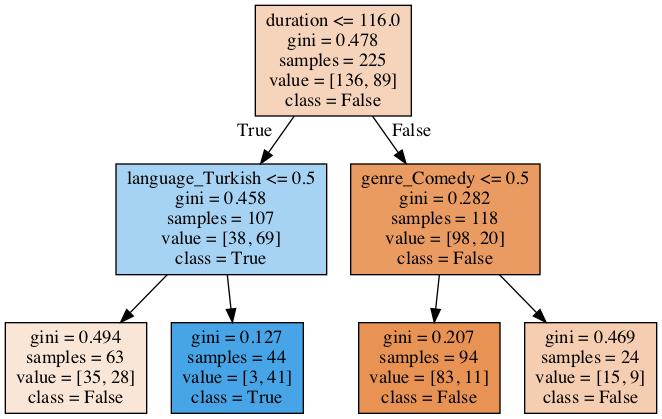

In [94]:

# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y1.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Since the Turkish language is unlikely to be a good indicator, let's drop Turkish and the country Turkey.

In [95]:
X1 = X.drop(['language_Turkish', 'country_Turkey'], axis = 1)

In [96]:
dt.fit(X1,Y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

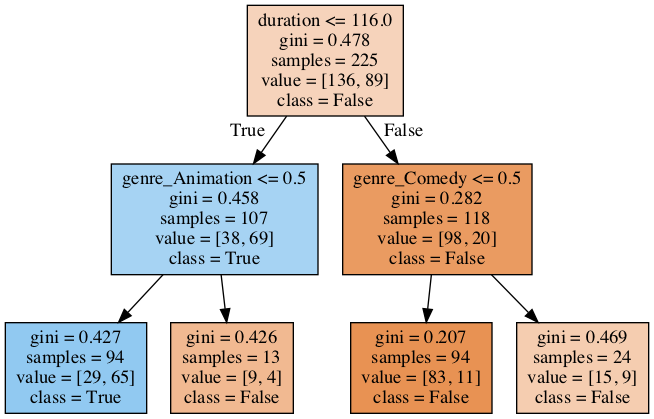

In [97]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X1.columns)
dt_target_names = [str(s) for s in Y1.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Only the left side of the tree helps us classify so let's focus on that side and verify is that is true with the help of a plot.

In [98]:
extreme10['<=116_duration'] = (extreme10['duration'] <= 116)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


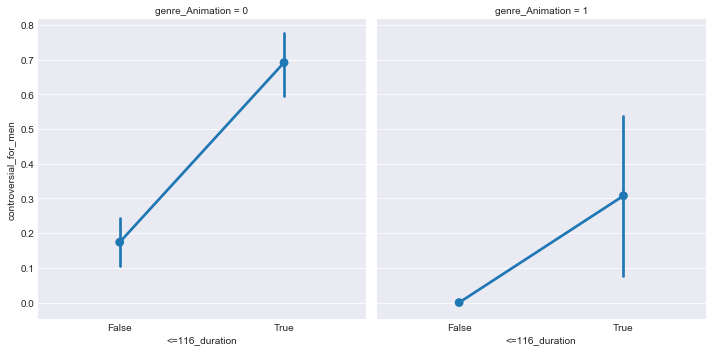

In [99]:
sns.catplot(x = '<=116_duration' , y = 'controversial_for_men', col = 'genre_Animation',
            data = extreme10, kind = 'point')

### The plot verifies that movies of duration less than 116 minutes tend to generate more controversy, but the genre of animation can help alleviating the controversy.

Let's look at the women next using the same methodology

In [100]:
Y2 = df[df.median_vote == 10].controversial_for_women

Build the tree

In [101]:
dt.fit(X,Y2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualize the tree

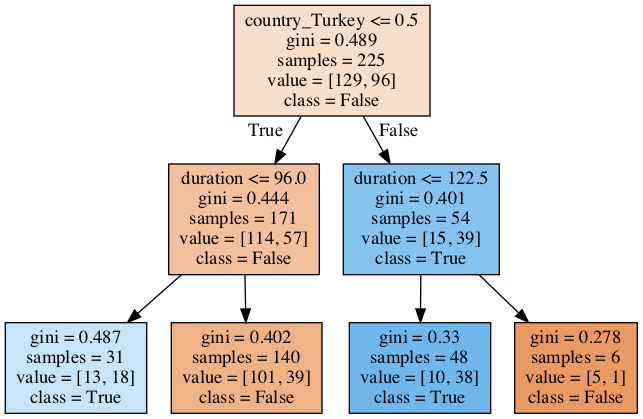

In [102]:

# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y2.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

We are dropping Turkey and Turkish language here as well

In [103]:
X2 = X.drop(['language_Turkish', 'country_Turkey'], axis = 1)

In [104]:
dt.fit(X2,Y2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

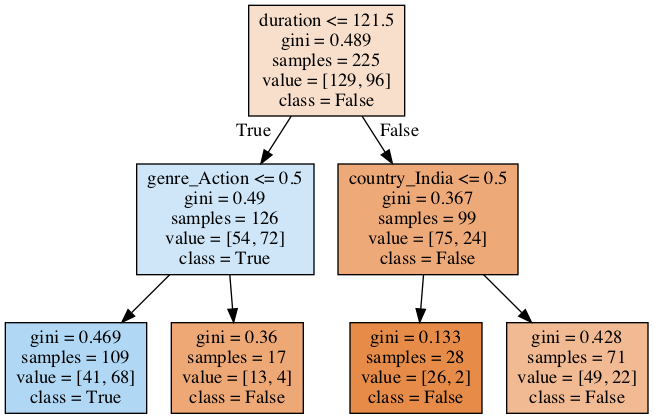

In [105]:

# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X2.columns)
dt_target_names = [str(s) for s in Y2.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [106]:
X3 = X2.drop(['country_India'], axis = 1)

In [107]:
dt.fit(X3,Y2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

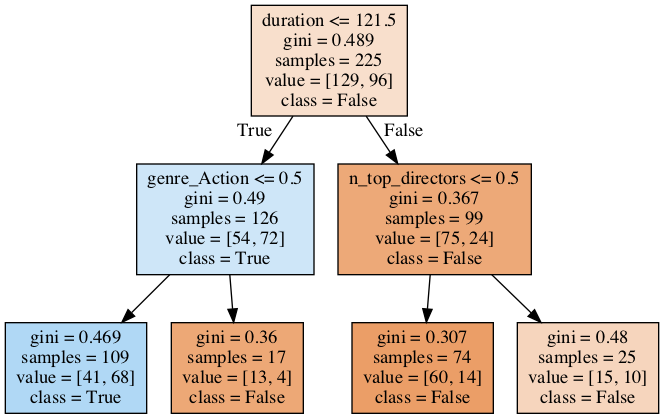

In [108]:

# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X3.columns)
dt_target_names = [str(s) for s in Y2.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Here we will only focus on the left side of the tree again, since the right side doesn't help us classify.

In [109]:
extreme10['<=121.5_duration'] = (extreme10['duration'] <= 121.5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


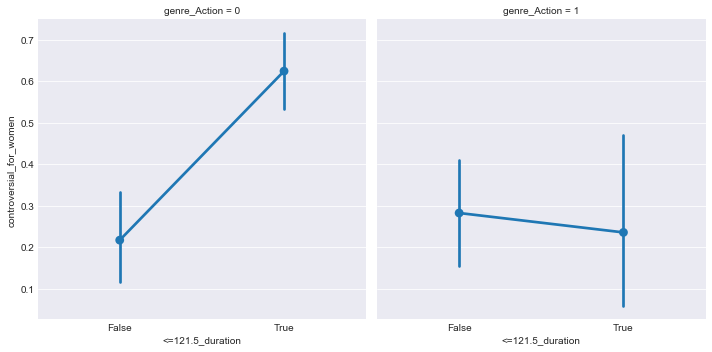

In [110]:
sns.catplot(x = '<=121.5_duration' , y = 'controversial_for_women', col = 'genre_Action',
            data = extreme10, kind = 'point')

### The plot verifies that movies of duration less than 121.5 minutes tend to generate more controversy, but the genre of action can help alleviating the controversy.

<font size='20px' color = 'red'>----------3.4 MANAGERIAL INSIGHT-----------</font>

The conlusion is that, if movie producers don't want to create gender controversies for "amazing movies", which tends to perform worse in terms of gross income than movies without controversies, for men, they need to avoid making the movies shorter than or equal to 116 minutes, though making them into animations could alleviate this problem, while, for women, they need to avoid making shorter than or equal to 121.5 minutes, though making them into action movies could help.

Overall, keeping the movies under 2 hours lowers controversy, and depending on which gender, the specific genre can help.